<a href="https://colab.research.google.com/github/SeongYunHong/Mirae-Python_Machine_Learning/blob/main/12_scikits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Scikits의 특징 : 프로그램이 강점인 사람이 유리

* 메모리를 작게 사용하고 처리 속도를 빠르게하기 위해서
* 차원 감소의 중점
* 모델 결합에 중점
* 일관성 있는 인터페이스
* 지속적으로 관리(모델 추가 및 삭제)
* GPU를 사용하지 않음 -> 범용모델로 만족(deeplearning)
  - (GPU -> TPU(HBM : CPU를 묶어서 : AI시대)

Scikits object
* estimator
* predictor
* transformer
* Model :
  - PCR(PCA + Regression)
  - PLS : 공분산으로 차원축소(종속변수, 독립변수간의 공분산 높게 하는 방향으로 차원축소)


Data transformations
* pre processing

Feature extraction
* PCA, FA(factor analysis : 요인분석, 상관관계가 높은 변수는 한개로 합쳐서 재명명)
* Model tranining
  - train-test-split : 7:3 ( 나눈 이유 : 성능 평가, 과대적합 방지, 일반화 성능을 높이기 위해)
    - 과대 적합 발생시 : 차원 축소해야됨
  - 편중을 방지 : CV 10개로 나눴다면 모두가 한번씩은 테스트에 참여
  - Hyper parameter tuning : GridSearchCV
    - parameter 조합으로 테스트 - 가장 좋은 결과를 내는 변수 조합 탐색


회귀분석
Classifier / Regressor

회귀
* 과적합 문제 : Regularization(규제) 사용
  - Lasso(L1), Ridge(L2), ElasticNet(L1+L2)

분류
* 분류문제는 과소적합의 위험이 있음 : RidgeClassifier 사용
  * LogisticRegressor, SGDClassifier : Gradient Optimization : Descent(경사하강법) : 기울기가 음수가 되면 더해주고 양수이면 빼서 최적점을 찾아가는 학습법 -> 신경망에서 채택

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split #데이터 분할
from sklearn.metrics import mean_squared_error,r2_score #평가 #mean_squared_error : (실제값 - 예측값)**2
#회귀 분석 : 결정계수(회귀제곱합, 편차제곱합 -> 총 제곱합)
#회귀제곱합 / 총 제곱함
from sklearn import datasets, linear_model #모델

diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X.shape #(442, 10)
#다중회귀 : 독립변수 ax+by+cz+ds....

(442, 10)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(diabetes_X,diabetes_y, random_state=0)
regr=linear_model.LinearRegression()
regr.fit(X_train,y_train)
diabetes_y_pred=regr.predict(X_test)
print("Coefficients : \n",regr.coef_)
print("Mean Squared Error : %.2f"%mean_squared_error(y_test,diabetes_y_pred))
print("결정 계수 : %.2f"%r2_score(y_test,diabetes_y_pred))
regr.score(X_test,y_test)

Coefficients : 
 [ -43.26198867 -208.66589855  593.40654802  302.89100542 -560.19094014
  261.40753499   -8.86674758  135.93174293  703.18354112   28.34977176]
Mean Squared Error : 3180.16
결정 계수 : 0.36


0.35940880381777085

비선형회귀

In [ ]:
x=np.array([0.0,1.0,2.0,3.0,4.0,5.0])
y=np.array([0.0,0.8,0.9,0.1,-0.8,-1.0])
z=np.polyfit(x,y,3) #polyfit : 다항 방정식 = 계수 3개 절편 1
z

array([ 0.08703704, -0.81349206,  1.69312169, -0.03968254])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures #PolynomialFeatures : 비선형회귀, 다항 특성 생성
X=np.arange(6).reshape(3,2)
print(X) #열 2개(변수=열=2개)
#[1, a, b, a^2, ab, b^2] 형태로 출
#[[  1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.],
#[  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
#[  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

poly=PolynomialFeatures(3) #숫자에 따라서 길이가 달라
poly.fit_transform(X)

[[0 1]
 [2 3]
 [4 5]]


array([[  1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

In [ ]:
from sklearn.linear_model import Ridge #L2 규제를 사용하는 회귀모델
from sklearn.pipeline import make_pipeline #train / test : 전처리 데이터처리 과정을 단향향으로 묶어서 처리
def f(x):
  return x*np.sin(x) #비선형으로 만들기 위해서 sin을 곱함

In [ ]:
x_plot=np.linspace(0,10,100)
x=np.linspace(0,10,100)
rng=np.random.RandomState(0)
rng.shuffle(x)
x=np.sort(x[:20]) #20개
y=f(x)

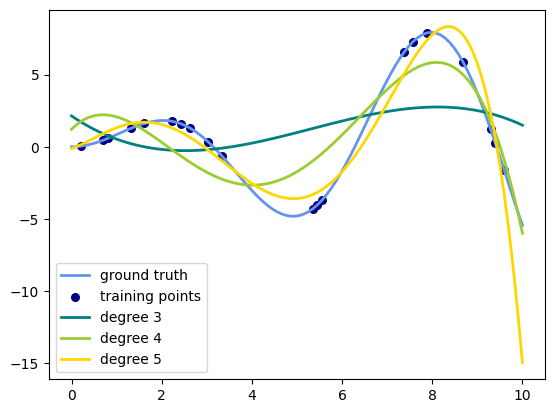

In [ ]:
X=x[:,np.newaxis] #np.newaxis : 축을 증가시킴(독립변수는 2차원으로 입력되어야함)
X_plot=x_plot[:,np.newaxis]
colors=['teal','yellowgreen','gold']
lw=2
plt.plot(x_plot,f(x_plot),color='cornflowerblue',linewidth=lw,label='ground truth')
#y 비선형으로 만든 데이터
plt.scatter(x,y,color='navy',s=30,marker='o',label='training points')
for count, degree in enumerate([3,4,5]): #0:3, 1:4, 2:5 데이터의 순서
#3차원 4차원 5차원으로 데이터를 비선형으로 확장시킴
  model=make_pipeline(PolynomialFeatures(degree),Ridge()) #(PolynomialFeatures(degree) : 데이터를 고차원으로 만드는 ,Ridge() : 모델
  model.fit(X,y)
  y_plot=model.predict(X_plot)
  plt.plot(x_plot,y_plot,color=colors[count],linewidth=lw,label='degree %d'%degree) #color 값 변경을 위해 count를 받아줌
plt.legend(loc='lower left')
plt.show()

In [ ]:
model=make_pipeline(PolynomialFeatures(5),Ridge())
model.fit(X,y)
y_plot=model.predict(X_plot)

In [ ]:
#문제
#선형회귀를하고 회귀식(y= ax + by +c)을 작성하시오
X=[[0,0],[1,1],[2,2]] #독립변수
y=[0,1,2] #종속변수

reg = linear_model.LinearRegression(fit_intercept=True)
reg.fit(X, y)
a, b = reg.coef_
c = reg.intercept_

# 회귀식 출력
print("회귀식: y = {:.2f}*x1 + {:.2f}*x2 + {:.2f}".format(a, b, c))

회귀식: y = 0.50*x1 + 0.50*x2 + 0.00


In [ ]:
reg.intercept_

1.1102230246251565e-16

In [ ]:
#선생님 답
x1=100
x2=100
y=reg.coef_[0]*x1+reg.coef_[1]*x2+reg.intercept_ #회귀식
y

99.99999999999999

전처리

* scale(z점수 정규화)=(데이터-평균)/표준편차
* robust_scale = (데이터-median)/(3사분위수-1사분위수)
* minmax = (데이터 - min) / (max - min) : 0에서 1사이 값
* maxabs_scale = 부호를 안정해서 -1에서 1사이의 값

In [ ]:
from sklearn.preprocessing import scale, robust_scale,minmax_scale,maxabs_scale
import seaborn as sns
from sklearn.datasets import load_iris
iris=load_iris()
print(type(iris))
data1=iris.data
print(data1.shape)
data2=scale(iris.data)
print("전처리 전 평균 : ",np.mean(data1,axis=0))
print("전처리 전 표준편차 : ",np.std(data1,axis=0))
print("전처리 후 평균 : ",np.mean(data2,axis=0)) #평균 0
print("전처리 후 표준편차 : ",np.std(data2,axis=0)) #표준편차 1

<class 'sklearn.utils._bunch.Bunch'>
(150, 4)
전처리 전 평균 :  [5.84333333 3.05733333 3.758      1.19933333]
전처리 전 표준편차 :  [0.82530129 0.43441097 1.75940407 0.75969263]
전처리 후 평균 :  [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
전처리 후 표준편차 :  [1. 1. 1. 1.]


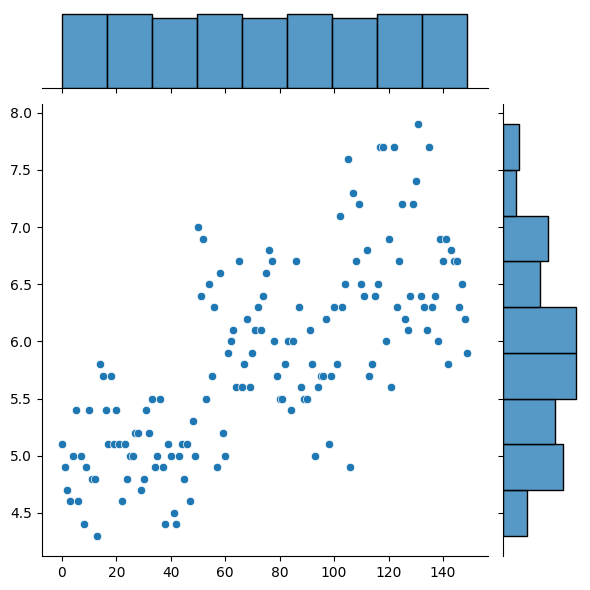

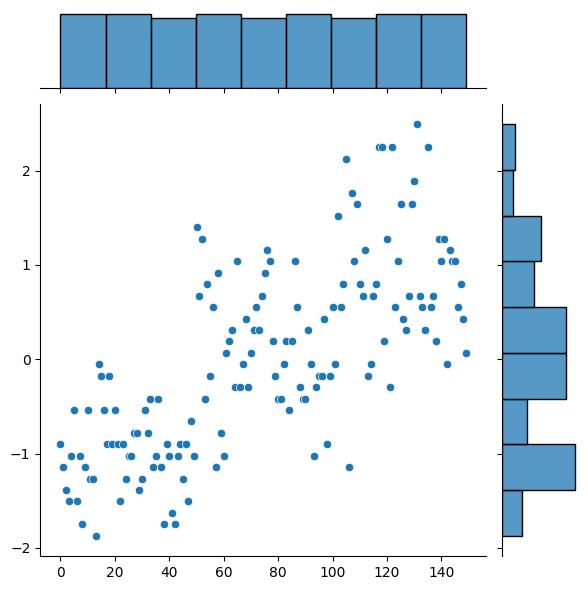

In [ ]:
sns.jointplot(data1[:,0])
plt.show()
sns.jointplot(data2[:,0])
plt.show()

In [ ]:
#StandardScaler == scale 연산방식도 동일
#scale : 함수, StandardScaler : 클래스
#StandardScaler를 쓰는 이유(fit, transform을 쓰면) : inverse로 원래 값을 찾기 위해

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(data1)
data2=scaler.transform(data1)
print(data1.std(),data2.std())
data3=scaler.fit_transform(data1)
data3.std()
#data3
#정규화한 데이터로 모델 생성 -> 예측 : 예측 결과가 정규화된 데이터로 출력

1.9738430577598278 1.0


1.0

In [ ]:
scaler.inverse_transform(data3).std() #정규화된 데이터로 예측된 데이터를 정규화 전 데이터로 복원

1.9738430577598278

In [ ]:
#z점수 정규화=(데이터-평균)/표준편차
(data3+data1.mean())*data1.std()

array([[ 5.060576  ,  8.84973394,  4.19298245,  4.24189868],
       [ 4.58224328,  6.57787249,  4.19298245,  4.24189868],
       [ 4.10391056,  7.48661707,  4.08079429,  4.24189868],
       [ 3.8647442 ,  7.03224478,  4.30517061,  4.24189868],
       [ 4.82140964,  9.30410623,  4.19298245,  4.24189868],
       [ 5.77807508, 10.6672231 ,  4.52954693,  4.76154123],
       [ 3.8647442 ,  8.39536165,  4.19298245,  4.50171996],
       [ 4.82140964,  8.39536165,  4.30517061,  4.24189868],
       [ 3.38641148,  6.12350021,  4.19298245,  4.24189868],
       [ 4.58224328,  7.03224478,  4.30517061,  3.98207741],
       [ 5.77807508,  9.75847852,  4.30517061,  4.24189868],
       [ 4.34307692,  8.39536165,  4.41735877,  4.24189868],
       [ 4.34307692,  6.57787249,  4.19298245,  3.98207741],
       [ 3.14724512,  6.57787249,  3.85641797,  3.98207741],
       [ 6.73474052, 11.12159538,  3.96860613,  4.24189868],
       [ 6.49557416, 12.93908454,  4.30517061,  4.76154123],
       [ 5.77807508, 10.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
data1=iris.data
minmax=MinMaxScaler()
res=minmax.fit_transform(data1)
res[0,:]

array([0.22222222, 0.625     , 0.06779661, 0.04166667])

In [ ]:
(res+data1.mean())*(data1.max()-data1.min())

array([[28.75643333, 31.8981    , 27.55191356, 27.3481    ],
       [28.3231    , 30.2731    , 27.55191356, 27.3481    ],
       [27.88976667, 30.9231    , 27.41971017, 27.3481    ],
       [27.6731    , 30.5981    , 27.68411695, 27.3481    ],
       [28.53976667, 32.2231    , 27.55191356, 27.3481    ],
       [29.40643333, 33.1981    , 27.94852373, 27.9981    ],
       [27.6731    , 31.5731    , 27.55191356, 27.6731    ],
       [28.53976667, 31.5731    , 27.68411695, 27.3481    ],
       [27.23976667, 29.9481    , 27.55191356, 27.3481    ],
       [28.3231    , 30.5981    , 27.68411695, 27.0231    ],
       [29.40643333, 32.5481    , 27.68411695, 27.3481    ],
       [28.10643333, 31.5731    , 27.81632034, 27.3481    ],
       [28.10643333, 30.2731    , 27.55191356, 27.0231    ],
       [27.0231    , 30.2731    , 27.15530339, 27.0231    ],
       [30.2731    , 33.5231    , 27.28750678, 27.3481    ],
       [30.05643333, 34.8231    , 27.68411695, 27.9981    ],
       [29.40643333, 33.

In [ ]:
result=res[0,:].reshape(-1,1)
minmax.inverse_transform([[0.22222222, 0.625     , 0.06779661, 0.04166667],[0.22222222, 0.625     , 0.06779661, 0.04166667]])

array([[5.09999999, 3.5       , 1.4       , 0.20000001],
       [5.09999999, 3.5       , 1.4       , 0.20000001]])

In [ ]:
minmax.inverse_transform(res[0,:].reshape(-1,4))

array([[5.1, 3.5, 1.4, 0.2]])

Normalize

In [ ]:
from sklearn import preprocessing
X=[[1.,-1.,2.],[2.,0.,0.],[0.,1.,-1]]
X_normalized=preprocessing.normalize(X,norm='l2') #l1 : 절대값 ((x,y)를 더한 값이 1이 되도록 정규화) #l2 : 거리값 구하기 (피타고라스 정리)
X_normalized
#벡터는 크기와 방향을 표현하는 것
#벡터의 크기 값 : 피타고라스(np.sqrt(x**2+y**2+z**2))
#(x/size,y/size,z/size) : 방향만 남음(범위 : -1 ~ 1)

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [ ]:
#Normalizer 클래스
normalizer=preprocessing.Normalizer().fit(X)
normalizer.transform(X)

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

결측치 처리

In [ ]:
from sklearn.impute import SimpleImputer
imp_mean=SimpleImputer(missing_values=np.nan,strategy='median') #전략 : mean, most_frequency 최빈수
imp_mean.fit([[7,2,3],[4,np.nan,6],[10,5,9]])
X=[[np.nan,2,3],[4,np.nan,6],[10,np.nan,9]] #첫번째 결측치 : (10+4)/2 #열내 동질적이라 열로 봐야함
print(imp_mean.transform(X))

[[ 7.   2.   3. ]
 [ 4.   3.5  6. ]
 [10.   3.5  9. ]]


K-NN(K nearest neighbor)

상수, 평균 중위값 0 max min 그 중 제일은 KNNImputer

In [ ]:
from sklearn.impute import KNNImputer

#거리값
#(1-3)**2 + (2-4)**2
#[1,2,np.nan]
#[3,4,3]
#[np.nan,6,5]
#[8,8,7]
X=[[1,2,np.nan],[3,4,3],[np.nan,6,5],[8,8,7]]
imputer=KNNImputer(n_neighbors=2)
imputer.fit_transform(X)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

In [ ]:
#문제
from sklearn.impute import KNNImputer
import pandas as pd
dict={"First":[100,90,np.nan,95],"Sencond":[30,45,56,np.nan],"Third":[np.nan,40,80,98]}
df=pd.DataFrame(dict)
df

,First,Sencond,Third
0,100.0,30.0,NaN
1,90.0,45.0,40.0
2,NaN,56.0,80.0
3,95.0,NaN,98.0


In [ ]:
#만약에 NaN이 많을 때는 상수로 초기화(평균, 0)
#채워나가면서
imp_mean=SimpleImputer(missing_values=np.nan,strategy='constant') #constant : 결측치를 0으로 채워줌
res=imp_mean.fit_transform(df)
res

array([[100.,  30.,   0.],
       [ 90.,  45.,  40.],
       [  0.,  56.,  80.],
       [ 95.,   0.,  98.]])

In [ ]:
imputer=KNNImputer(n_neighbors=5)
df_filled=imputer.fit_transform(res)

In [ ]:
from scipy.spatial import distance
data=df_filled[:,:1]
distance_matrix=distance.cdist(data,data,'euclidean')
distance_matrix

array([[0.        , 0.05555556, 0.11111111, ..., 0.38888889, 0.30555556,
        0.22222222],
       [0.05555556, 0.        , 0.05555556, ..., 0.44444444, 0.36111111,
        0.27777778],
       [0.11111111, 0.05555556, 0.        , ..., 0.5       , 0.41666667,
        0.33333333],
       ...,
       [0.38888889, 0.44444444, 0.5       , ..., 0.        , 0.08333333,
        0.16666667],
       [0.30555556, 0.36111111, 0.41666667, ..., 0.08333333, 0.        ,
        0.08333333],
       [0.22222222, 0.27777778, 0.33333333, ..., 0.16666667, 0.08333333,
        0.        ]])

보스턴 집값 데이터



In [ ]:
import pandas as pd
import numpy as np
title =  ['RM','ZN','INDUS','CHAS', 'NOX','RM','AGE','RAD', 'TAX','PTRATIO','B', 'LSTAT', 'medv'] #medv : 집값
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
print(type(data))
boston_df = pd.DataFrame(data, columns = title)
boston_df.head()

<class 'numpy.ndarray'>


,RM,ZN,INDUS,CHAS,NOX,RM,AGE,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
boston_df.shape

(506, 13)

z점수에 의한 이상치 제거

In [ ]:
from scipy import stats
#z점수 : 표준 정규분포 곡선의 분위로 표현된 데이터
#표준편차 몇배수 인가
#표준편차  1배수 : 68%
#표준편차  2배수 : 95%
#표준편차  3배수 : 99.7%
z=np.abs(stats.zscore(boston_df)) #z점수 -> 없으면 0으로
print(z.shape)
threshold=3 #표준편차 3배수
print(np.where(z>threshold))

(506, 13)
(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466]), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1

In [ ]:
boston_df=boston_df[(z<3).all(axis=1)]
boston_df.shape

(415, 13)

In [ ]:
Q1=boston_df.quantile(0.25)
Q3=boston_df.quantile(0.75)
IQR=Q3-Q1
print(IQR)
#이상치 출력
print(boston_df<(Q1-1.5*IQR))
print(boston_df>(Q3+1.5*IQR))

RM           2.07111
ZN          12.50000
INDUS       12.97000
CHAS         0.00000
NOX          0.16000
RM           0.67350
AGE         50.15000
RAD          3.08410
TAX          4.00000
PTRATIO    158.00000
B            2.80000
LSTAT       19.02000
medv         9.00500
dtype: float64
        RM     ZN  INDUS   CHAS    NOX     RM    AGE    RAD    TAX  PTRATIO  \
0    False  False  False  False  False  False  False  False  False    False   
1    False  False  False  False  False  False  False  False  False    False   
2    False  False  False  False  False  False  False  False  False    False   
3    False  False  False  False  False  False  False  False  False    False   
4    False  False  False  False  False  False  False  False  False    False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...      ...   
501  False  False  False  False  False  False  False  False  False    False   
502  False  False  False  False  False  False  False  False  False    False   
5

In [ ]:
#문제
#IQR 방식으로 이상치를 제거한 데이터를 추출하시오
#robust_scale = (데이터-median)/(3사분위수-1사분위수)

boston_df_out=boston_df[~(boston_df<(Q1-1.5*IQR)) | (boston_df>(Q3+1.5*IQR))]
boston_df_out.shape

(415, 13)

In [ ]:
#문제
#다음 데이터에서 z점수를 이용한 이상치 제거를 하시오
data=[1,2,2,2,3,1,1,15,2,2,2,3,1,1,2]
data=np.array(data)
zd=(data-np.mean(data))/np.mean(data)<3
data[zd]

array([1, 2, 2, 2, 3, 1, 1, 2, 2, 2, 3, 1, 1, 2])

In [ ]:
data=np.array(data)
z=np.abs(stats.zscore(data))
print(z.shape)
threshold=3
data[np.where(z<3)]

(15,)


array([1, 2, 2, 2, 3, 1, 1, 2, 2, 2, 3, 1, 1, 2])

for문을 이용한 z점수 정규화

In [ ]:
mean=np.mean(data)
std=np.std(data)
print('평균 : ',mean)
print('표준편차 : ',std)

threshold=3 #문지방(경계선)
outlier=[]
for i in data:
  z=(i-mean)/std
  if np.abs(z)>threshold:
    outlier.append(i)
print("이상치 데이터 : ",outlier)

평균 :  2.6666666666666665
표준편차 :  3.3598941782277745
이상치 데이터 :  [15]


In [ ]:
nd_data=np.array(data)
mean=np.mean(nd_data)
std=np.std(nd_data)
data_z=((nd_data-mean)/std)
index=np.where(np.abs(data_z)>3)
nd_data[index]

array([15])

In [ ]:
data2=scale(data) #scale의 리턴값 : ndarray
np.array(data)[np.abs(data2)>3]

array([15])

원 핫 인코딩 : 범주형 데이터의 정규화(0과 1로 데이터 표현)

In [ ]:
#원 핫 인코딩 : 전처리 모델 class
import numpy as np

from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
X=np.array([[2],[3],[4],[2],[4]])
ohe.fit(X)
ohe.categories_ #3개 종류

[array([2, 3, 4])]

In [ ]:
print(ohe.transform([X[0]]).toarray()) #toarray()를 붙여줘야 정상적인 값 추출 가능 #데이터 입력은 2차원으로

[[1. 0. 0.]]


In [ ]:
ohe.inverse_transform([[1.,0.,0.]])

array([[2]])

In [ ]:
#요소별 종류 파악 / True Fasle로 만들어 사이즈가 1인 데이터로 (정규화 진)
ohe=OneHotEncoder()
X=np.array([[0,0,4],[1,1,0],[0,2,1],[1,0,2],[1,1,3]])
ohe.fit(X)
ohe.categories_

[array([0, 1]), array([0, 1, 2]), array([0, 1, 2, 3, 4])]

In [ ]:
ohe.transform(X).toarray()
    #0 1 0 1 2 0 1 2 3 4 : 자리
    #1 0 1 0 0 0 0 0 0 1
    #0 1 0 1 0 1 0 0 0 0
    #1 0 0 1 0 0 1 0 0 0
    #0 1 0 0 0 0 0 1 0 0
    #0 1 0 1 0 0 0 0 1 0

array([[1., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 1., 0.]])

In [ ]:
ohe.inverse_transform([[1., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 1., 0.]])


array([[0, 0, 4],
       [1, 1, 0],
       [0, 2, 1],
       [1, 0, 2],
       [1, 1, 3]])

In [ ]:
#문제
#원핫인코딩 하시오
X=[["Male",1],["Female",2],["Female",3]]
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X)
print(ohe.categories_)
ohe.transform(X).toarray()

[array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]


array([[0., 1., 1., 0., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.]])

Label 범주화

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit([1,2,2,6])
le.fit([1,2,2,6,4])
le.classes_ #정렬되고 중복을 제거
# 0 1 2 3
# 1 2 4 6

array([1, 2, 4, 6])

In [ ]:
le.transform([1,1,2,6])

array([0, 0, 1, 3])

In [ ]:
le.inverse_transform([0,0,1,3])

array([1, 1, 2, 6])

DictVectorizer

In [ ]:
from sklearn.feature_extraction import DictVectorizer
v=DictVectorizer(sparse=False) #sparse : 희소행렬
#단어 : foo, bar, baz.................................................sparce 메모리 낭비
#        2    1    2
#학습 데이터는 vector
D=[{'foo':1,'bar':2},{'foo':3,'baz':1}] #text mining
X=v.fit_transform(D)
X

array([[2., 0., 1.],
       [0., 1., 3.]])

In [ ]:
v.feature_names_ #열 이름
# bar  baz  foo
# 2     0    1
# 0     1    3
#학습하려면 대수적으로 표현되어야함(+-*/)

['bar', 'baz', 'foo']

In [ ]:
v.inverse_transform(X)

[{'bar': 2.0, 'foo': 1.0}, {'baz': 1.0, 'foo': 3.0}]

In [ ]:
from pandas import DataFrame, Series
from itertools import cycle
area = '서울 부산 대구 인천 광주 대전 울산 세종 경기 강원 충북 충남 전북 전남 경북 경남 제주'.split()
college = '인문대학 사회과학대학 자연과학대학 간호대학 경영대학 공과대학 미술대학'.split()
gender = '남성 여성'.split()
fake_data = zip(range(100), cycle(area), cycle(college), cycle(gender)) #cycle : 반복
hundred_students = DataFrame([data for num, *data in fake_data],
                              columns='지역 단과대 성별'.split())
hundred_students.head(10)

,지역,단과대,성별
0,서울,인문대학,남성
1,부산,사회과학대학,여성
2,대구,자연과학대학,남성
3,인천,간호대학,여성
4,광주,경영대학,남성
5,대전,공과대학,여성
6,울산,미술대학,남성
7,세종,인문대학,여성
8,경기,사회과학대학,남성
9,강원,자연과학대학,여성


In [ ]:
college_one_hot_encoded=pd.get_dummies(hundred_students.단과대)
college_one_hot_encoded

,간호대학,경영대학,공과대학,미술대학,사회과학대학,인문대학,자연과학대학
0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
95,0,1,0,0,0,0,0
96,0,0,1,0,0,0,0
97,0,0,0,1,0,0,0
98,0,0,0,0,0,1,0


In [ ]:
pd.get_dummies(hundred_students,prefix=['지역','단과대','성별']).head()

,지역_강원,지역_경기,지역_경남,지역_경북,지역_광주,지역_대구,지역_대전,지역_부산,지역_서울,지역_세종,...,지역_충북,단과대_간호대학,단과대_경영대학,단과대_공과대학,단과대_미술대학,단과대_사회과학대학,단과대_인문대학,단과대_자연과학대학,성별_남성,성별_여성
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
#변수 선택법-과대적합을 방지
#중요변수 : 분산이 큰 것이 중요변수
#SelectKbest, RFE(recursive feature eliminate) 재귀적으로
#변수 중요도를 출력하는 모델을 중심한 모델 기준 : tree model(DT->RF, AdaBoost, gradient Boost -> XG Boost)
#PCA 주성분 분석
#feature_selection
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
#SVR : Support Vector Machine : 고차원을 좋아하는 모델
#kernel 함수 : 선형, 다차방정식, 가우시안 커널, logistic kernel
#support vector : 데이터의 최종위치를 연결선
#convex hull : 최외곽의 경계선을 연결한 선
X,y=make_friedman1(n_samples=50,n_features=5,random_state=0) #50X50
estimator=SVR(kernel="linear")

selector=RFE(estimator) #모델을 감싼 변수선택기 : 분산
selector=selector.fit(X,y)
selector.support_

array([False, False, False,  True,  True])

In [ ]:
selector.ranking_

array([3, 2, 4, 1, 1])

In [ ]:
from sklearn.feature_selection import VarianceThreshold #분산을 경계선으로
X=[[0,0,1],[0,1,0],[1,0,0],[0,1,1],[0,1,0],[0,1,1]]
sel=VarianceThreshold(threshold=(0.15))
sel.fit_transform(X) #첫 열이 사라졌음

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

In [ ]:
#필요없는 열들은 noise 역할을하여 제거하여야한다
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 #카이제곱값을 기준으로
X,y=load_iris(return_X_y=True)
print("원본",X.shape)
X_new=SelectKBest(chi2,k=2).fit_transform(X,y)
X_new.shape

원본 (150, 4)


(150, 2)